In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:

# Cargar el conjunto de datos
viviendas = fetch_california_housing()

# Crear un DataFrame
df = pd.DataFrame(viviendas.data, columns=viviendas.feature_names)
df['MedHouseVal'] = viviendas.target

In [3]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [4]:
# Comprobar si hay valores nulos
print(df.isnull().sum())

# Estadísticas descriptivas
print(df.describe())

# Definir las características (X) y la variable objetivo (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000

In [5]:
# Dividir los datos en entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=25)

print(X_entrenamiento.shape, X_prueba.shape, y_entrenamiento.shape, y_prueba.shape)


(14448, 8) (6192, 8) (14448,) (6192,)


In [7]:
 #Crear el modelo
modelo = LinearRegression()

# Ajustar el modelo
modelo.fit(X_entrenamiento, y_entrenamiento)

# Mostrar los coeficientes
print('Intercepto:', modelo.intercept_)
print('Coeficientes:', modelo.coef_)


Intercepto: -37.55216631658924
Coeficientes: [ 4.41181942e-01  9.70730794e-03 -1.19993946e-01  7.84709051e-01
 -3.39466724e-07 -3.28239095e-03 -4.23679731e-01 -4.39311822e-01]


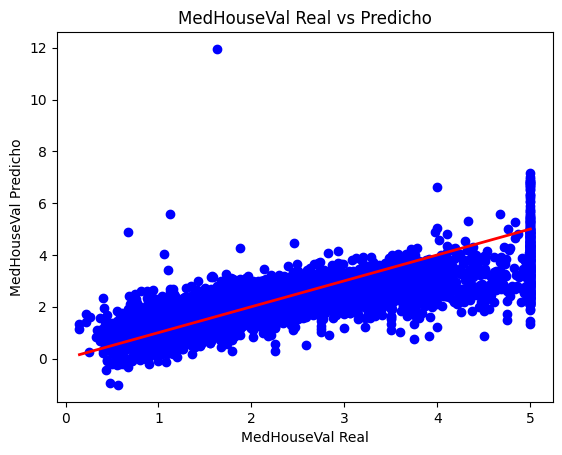

In [8]:
# Hacer predicciones
y_pred = modelo.predict(X_prueba)

# Graficar los resultados
plt.scatter(y_prueba, y_pred, color='blue')
plt.plot([y_prueba.min(), y_prueba.max()], [y_prueba.min(), y_prueba.max()], color='red', linewidth=2)
plt.xlabel('MedHouseVal Real')
plt.ylabel('MedHouseVal Predicho')
plt.title('MedHouseVal Real vs Predicho')
plt.show()


In [9]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_prueba, y_pred)

# Calcular el R-cuadrado
r2 = r2_score(y_prueba, y_pred)

print('Error cuadrático medio:', mse)
print('R-cuadrado:', r2)


Error cuadrático medio: 0.5385446422423639
R-cuadrado: 0.5966234519623754
